In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
file_path = "KBZ_Pay_Sentiment_Cate_Ver3.csv"

# 1. LOAD DATA
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig', on_bad_lines='skip', engine='python')
except Exception as e:
    print(f"Error loading file: {e}")
    sys.exit()

In [7]:
# 2. DATA CLEANING
df = df.dropna(subset=['Device Type', 'Rating', 'Emoji_Count'])
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

In [4]:
# 3. CALCULATE DATA POINTS FOR CHARTS
# A. Frequency and Percentage data for Pie Chart
device_counts = df['Device Type'].value_counts()

# B. Average Rating data for Bar Chart
device_avg_rating = df.groupby('Device Type')['Rating'].mean().round(2).reset_index()

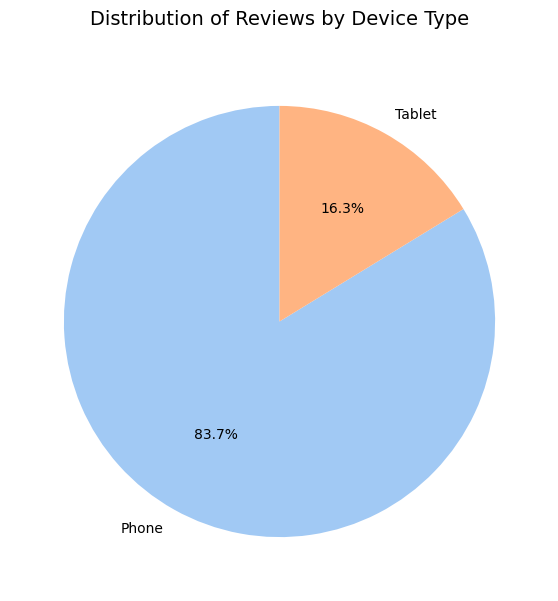

C:\Users\tayza\AppData\Local\Temp\ipykernel_14064\2700749386.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


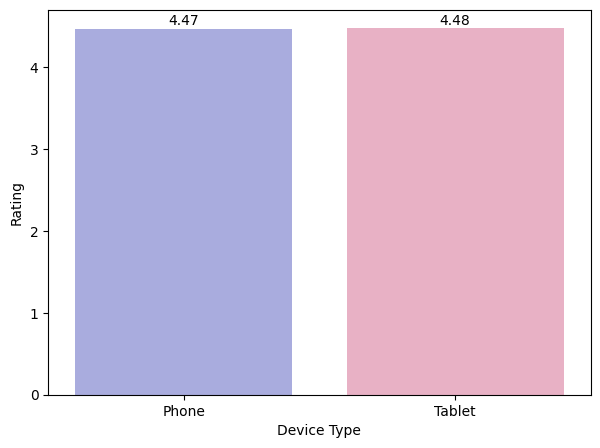

In [5]:
# 4. GENERATE CHARTS

# --- CHART 1: PIE CHART (Device Distribution) ---
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    device_counts,
    labels=device_counts.index,
    autopct='%1.1f%%',  # Shows percentage with one decimal place
    startangle=90,
    colors=sns.color_palette("pastel")
)

plt.title('Distribution of Reviews by Device Type', fontsize=14, pad=20)
plt.show() # Display the Pie Chart # --- CHART 2: BAR CHART (Average Rating) ---
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Device Type',
    y='Rating',
    data=device_avg_rating,
    palette=['#a0a4e7', '#f1a8c3'] # Using soft colors
)

# Add value labels on top of bars
for index, row in device_avg_rating.iterrows():
    plt.text(
        index,
        row['Rating'] + 0.01,
        f"{row['Rating']}",
        color='black',
        ha="center",
        va='bottom'
    )